In [4]:
from sklearn.datasets import load_iris
import pandas as pd 

In [6]:
iris_data = load_iris(as_frame=True)

In [7]:
df = pd.DataFrame(iris_data['data'])
df['label'] = iris_data['target'] 

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


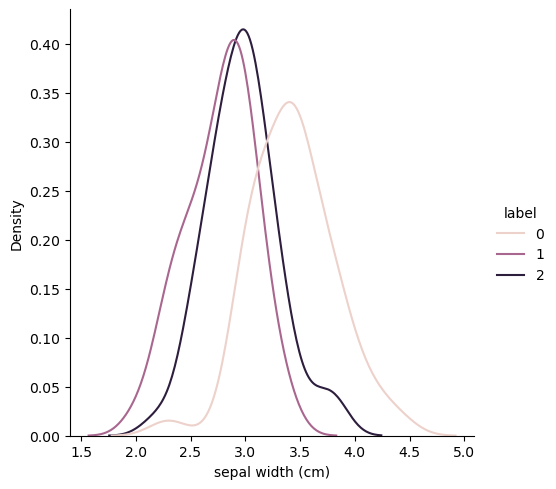

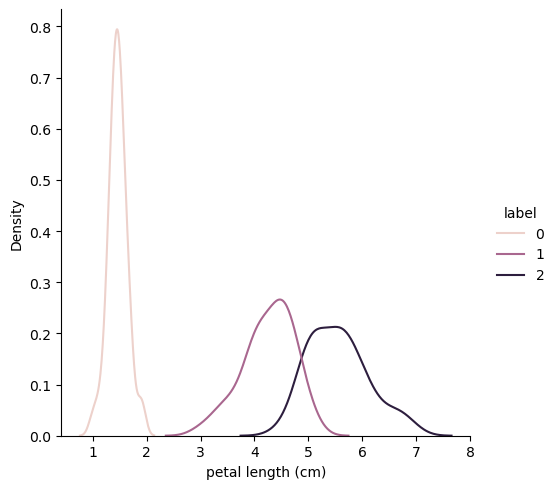

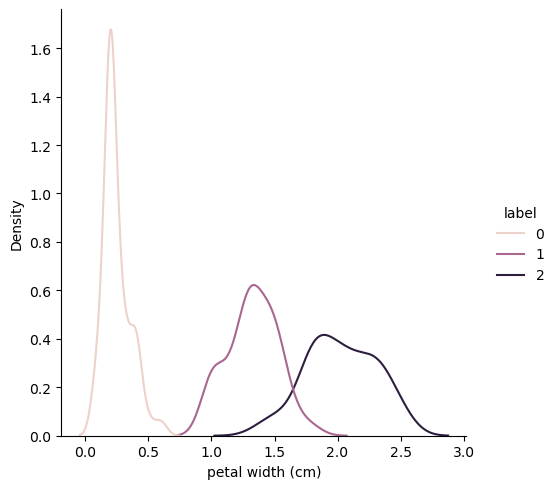

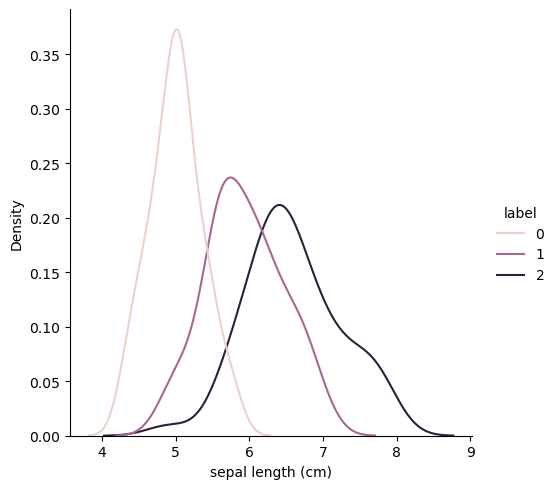

In [14]:
import matplotlib.pyplot as plt

import seaborn as sns

 

sns.displot(data = df, x = 'sepal length (cm)', kind = 'kde', hue = 'label')
plt.show()

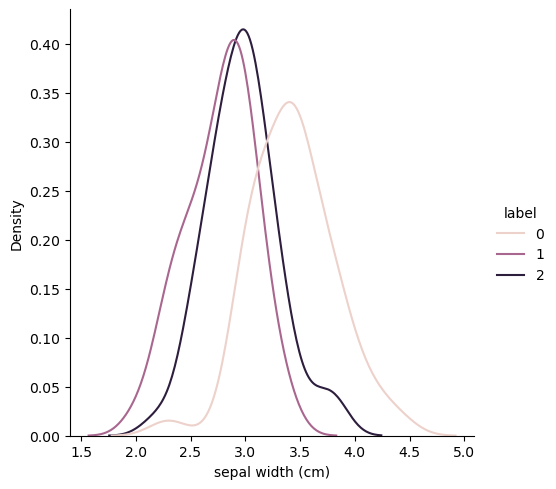

In [15]:
sns.displot(data = df, x = 'sepal width (cm)', kind = 'kde', hue = 'label')
plt.show()

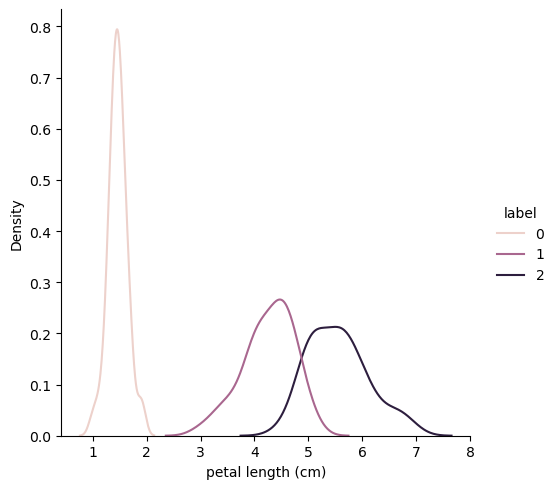

In [16]:
sns.displot(data = df, x = 'petal length (cm)', kind = 'kde', hue = 'label')
plt.show()

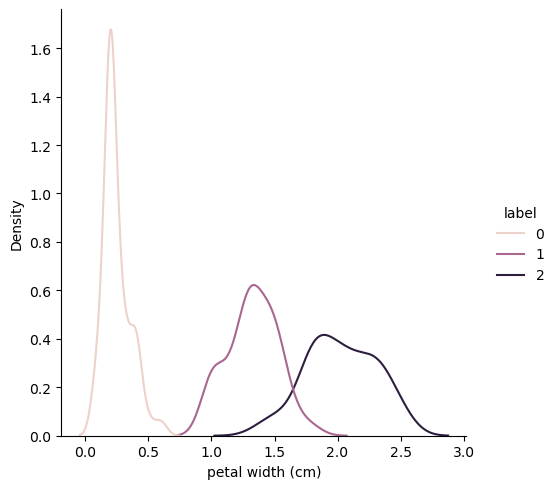

In [17]:
sns.displot(data = df, x = 'petal width (cm)', kind = 'kde', hue = 'label')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(df, test_size = 0.3)

X_train = data_train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_train = data_train['label'].values

X_test = data_test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_test = data_test['label'].values

In [21]:
from sklearn.neighbors import KNeighborsClassifier

ml_model = KNeighborsClassifier(n_neighbors=3)
ml_model = ml_model.fit(X_train, y_train)

C:\Users\Aula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


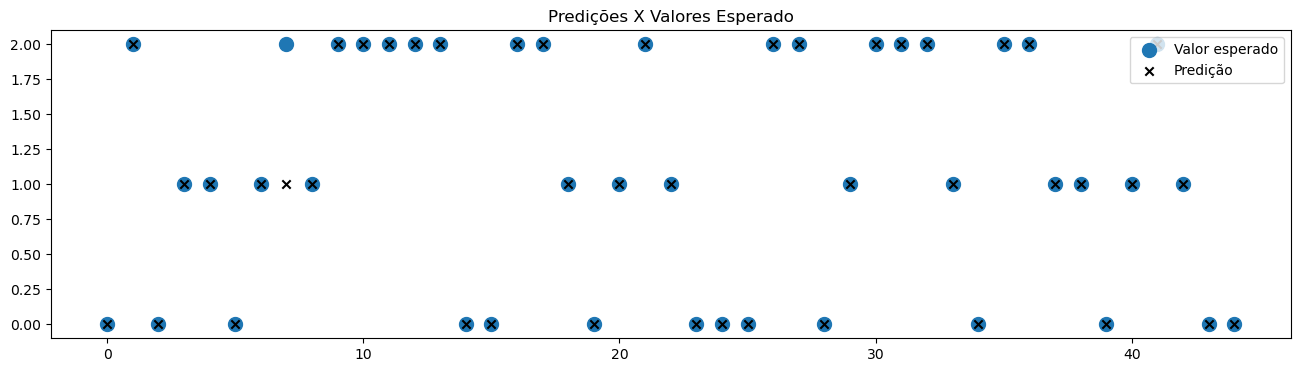

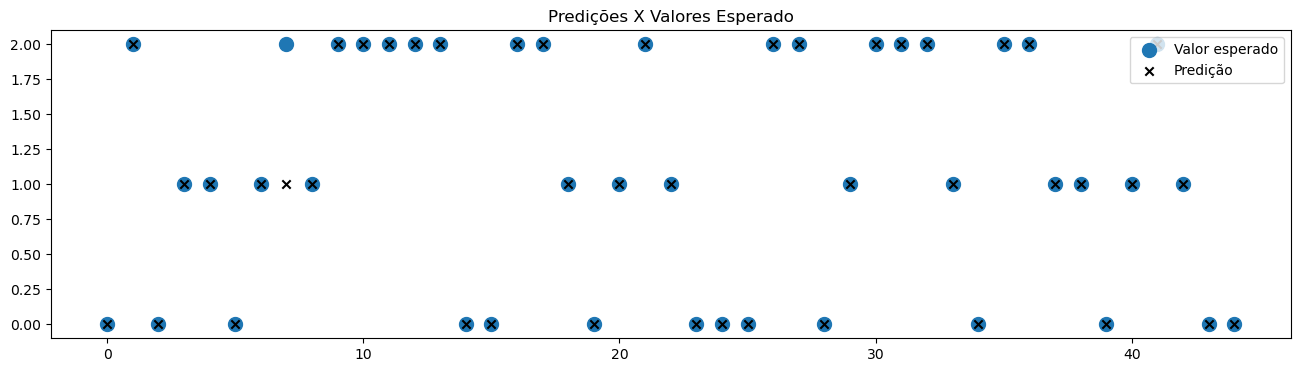

In [23]:
y_pred = ml_model.predict(X_test)

plt.figure(figsize=(16,4));
plt.scatter(range(45), y_test, marker='o', s = 100, label = 'Valor esperado');
plt.scatter(range(45), y_pred, marker='x', color = 'black', label = 'Predição');
plt.title('Predições X Valores Esperado');
plt.legend(loc='best')
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.96        13
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



C:\Users\Aula\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Aula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


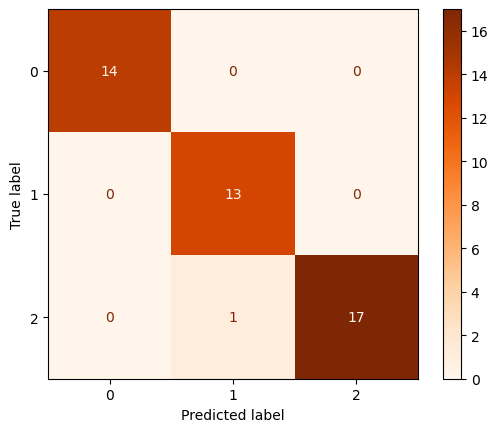

In [25]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ml_model, X_test, y_test, cmap='Oranges');
plt.show()